In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
import matplotlib.pyplot as plt

import helper_utils
# import unittests

In [4]:
# Load the dataset from the CSV file
file_path = './data_with_features.csv'
data_df = pd.read_csv(file_path)

# Print the shape of the DataFrame
print(f"Dataset Shape: {data_df.shape}\n")

Dataset Shape: (100, 4)



In [9]:
data_df.head(5)

,distance_miles,time_of_day_hours,is_weekend,delivery_time_minutes
0,1.60,8.20,0,7.22
1,13.09,16.80,1,32.41
2,6.97,8.02,1,17.47
3,10.66,16.07,0,37.17
4,18.24,13.47,0,38.36


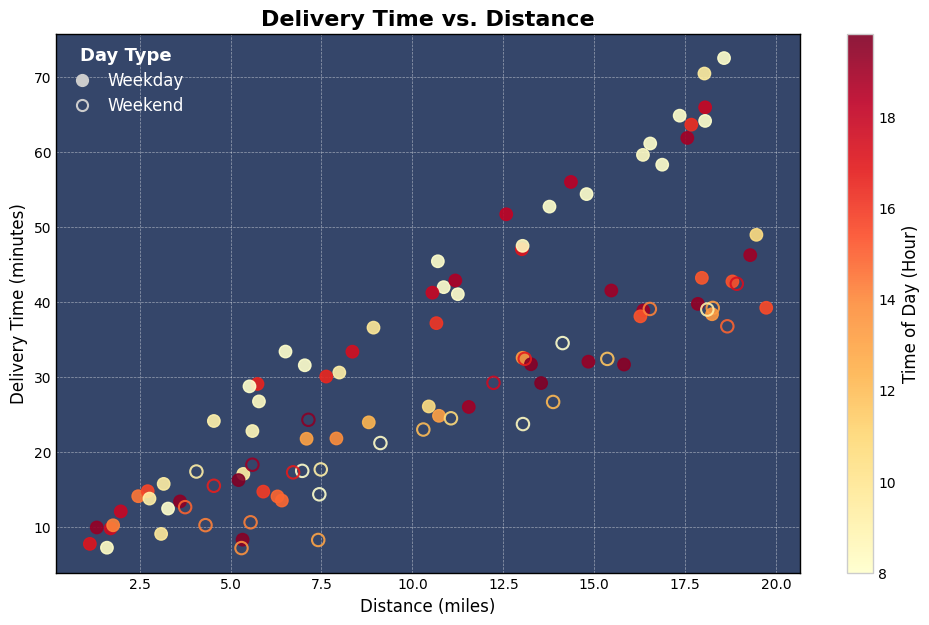

In [8]:
helper_utils.plot_delivery_data(data_df)

In [11]:
data_df.dtypes

distance_miles           float64
time_of_day_hours        float64
is_weekend                 int64
delivery_time_minutes    float64
dtype: object

In [12]:
# Define the 5 rows of data as a single 2D tensor
sample_tensor = torch.tensor([
    # distance, time_of_day, is_weekend, delivery_time
    [1.60,      8.20,        0,          7.22],   # row 1
    [13.09,     16.80,       1,          32.41],  # row 2       
    [6.97,      8.02,        1,          17.47],  # row 3
    [10.66,     16.07,       0,          37.17],  # row 4
    [18.24,     13.47,       0,          38.36]   # row 5
], dtype=torch.float32)

In [13]:
print(sample_tensor.dtype)  # torch.float32
print(sample_tensor)  # You'll see 0. and 1. for is_weekend

torch.float32
tensor([[ 1.6000,  8.2000,  0.0000,  7.2200],
        [13.0900, 16.8000,  1.0000, 32.4100],
        [ 6.9700,  8.0200,  1.0000, 17.4700],
        [10.6600, 16.0700,  0.0000, 37.1700],
        [18.2400, 13.4700,  0.0000, 38.3600]])


In [ ]:
sample_hours = sample_tensor[:, 1]
print(sample_hours)

is_morning_rush = (sample_hours >= 8.0) & (sample_hours < 10.0)
print(is_morning_rush)

tensor([ 8.2000, 16.8000,  8.0200, 16.0700, 13.4700])
tensor([ True, False,  True, False, False])


In [20]:
sample_weekend = sample_tensor[:, 2]
print(sample_weekend == 1.0)
print(sample_weekend.bool())

tensor([False,  True,  True, False, False])
tensor([False,  True,  True, False, False])


In [22]:
sample_weekday = ~sample_tensor[:, 2].bool()
print(sample_weekday)

tensor([ True, False, False,  True,  True])


In [23]:
sample_weekday & is_morning_rush

tensor([ True, False, False, False, False])

In [24]:
(sample_weekday & is_morning_rush).float()

tensor([1., 0., 0., 0., 0.])

In [25]:
data_df.head()

,distance_miles,time_of_day_hours,is_weekend,delivery_time_minutes
0,1.60,8.20,0,7.22
1,13.09,16.80,1,32.41
2,6.97,8.02,1,17.47
3,10.66,16.07,0,37.17
4,18.24,13.47,0,38.36


In [29]:
print(data_df.dtypes)
print(data_df.values)

distance_miles           float64
time_of_day_hours        float64
is_weekend                 int64
delivery_time_minutes    float64
dtype: object
[[ 1.6   8.2   0.    7.22]
 [13.09 16.8   1.   32.41]
 [ 6.97  8.02  1.   17.47]
 [10.66 16.07  0.   37.17]
 [18.24 13.47  0.   38.36]
 [ 5.74 16.59  0.   29.06]
 [ 8.8  12.25  0.   23.94]
 [15.36 11.76  1.   32.4 ]
 [ 5.35  9.42  0.   17.06]
 [ 2.46 14.44  0.   14.09]
 [ 6.51  8.    0.   33.38]
 [ 4.06  9.33  1.   17.38]
 [18.66 14.86  1.   36.75]
 [16.35 19.09  0.   38.86]
 [13.03 13.42  0.   32.55]
 [17.56 18.92  0.   61.87]
 [16.27 15.26  0.   38.08]
 [ 4.54  9.1   0.   24.12]
 [17.96 15.2   0.   43.21]
 [11.25  8.    0.   41.03]
 [16.34  8.32  0.   59.61]
 [18.03  9.49  0.   70.46]
 [ 7.04  8.    0.   31.55]
 [ 3.09  9.7   0.    9.06]
 [ 5.33 19.59  0.    8.29]
 [ 9.12  8.17  1.   21.18]
 [16.54  8.    0.   61.13]
 [17.35  8.    0.   64.84]
 [ 1.13 17.1   0.    7.73]
 [10.7   8.    0.   45.42]
 [ 8.93  9.8   0.   36.57]
 [ 5.22 19.82  0.

In [30]:
full_tensor = torch.tensor(data_df.values, dtype=torch.float32)

In [32]:
print(full_tensor.shape)
print(full_tensor.dtype)

torch.Size([100, 4])
torch.float32


In [33]:
raw_distances = full_tensor[:, 0]
print(raw_distances)

tensor([ 1.6000, 13.0900,  6.9700, 10.6600, 18.2400,  5.7400,  8.8000, 15.3600,
         5.3500,  2.4600,  6.5100,  4.0600, 18.6600, 16.3500, 13.0300, 17.5600,
        16.2700,  4.5400, 17.9600, 11.2500, 16.3400, 18.0300,  7.0400,  3.0900,
         5.3300,  9.1200, 16.5400, 17.3500,  1.1300, 10.7000,  8.9300,  5.2200,
         3.2800,  7.4100, 18.9200,  7.1400, 10.8600, 14.3600,  7.9100, 19.4600,
        19.2900,  5.7800, 10.4500,  6.7200,  6.4100,  1.7000, 12.5800, 10.5500,
         1.9800,  6.2900, 18.2600,  5.5500,  3.7500, 10.3000, 19.7300,  5.6000,
        13.7700, 15.4700,  5.5200, 14.8400,  7.9900, 13.0100, 13.0400, 11.1800,
         2.7200, 16.8700,  7.0900,  4.5400,  1.7700, 12.2300, 13.8700,  1.3200,
        10.7300,  5.3000, 13.2600,  4.3100, 14.1300,  8.3500, 18.8000,  3.6100,
         7.4800,  3.1600, 18.5700, 17.6700,  5.9000, 13.5400, 16.5300, 11.5500,
        11.0600,  5.6000,  2.7700, 18.0500, 18.1100, 13.0300,  7.4400,  7.6300,
        14.7900, 18.0500, 17.8500, 15.82

In [36]:
rd_2d = raw_distances.unsqueeze(1)
print(rd_2d.shape)

torch.Size([100, 1])


In [37]:
rd_2d.mean()

tensor(10.4588)

In [39]:
torch.cat([
    rd_2d, 
    rd_2d
    ], dim=1).shape

torch.Size([100, 2])

In [40]:
# GRADED FUNCTION: rush_hour_feature

def rush_hour_feature(hours_tensor, weekends_tensor):
    """
    Engineers a new binary feature indicating if a delivery is in a weekday rush hour.

    Args:
        hours_tensor (torch.Tensor): A tensor of delivery times of day.
        weekends_tensor (torch.Tensor): A tensor indicating if a delivery is on a weekend.

    Returns:
        torch.Tensor: A tensor of 0s and 1s indicating weekday rush hour.
    """

    ### START CODE HERE ###
    
    # Define rush hour and weekday conditions
    is_morning_rush = (hours_tensor >= 8.0) & (hours_tensor < 10.0)
    is_evening_rush = (hours_tensor >= 16.0) & (hours_tensor < 19.0)
    is_weekday = ~weekends_tensor.bool()

    # Combine the conditions to create the final rush hour mask
    is_rush_hour_mask = is_weekday & (is_morning_rush | is_evening_rush)

    ### END CODE HERE ###

    # Convert the boolean mask to a float tensor to use as a numerical feature
    return is_rush_hour_mask.float()

In [41]:
# GRADED FUNCTION: prepare_data

def prepare_data(df):
    """
    Converts a pandas DataFrame into prepared PyTorch tensors for modeling.

    Args:
        df (pd.DataFrame): A pandas DataFrame containing the raw delivery data.

    Returns:
        prepared_features (torch.Tensor): The final 2D feature tensor for the model.
        prepared_targets (torch.Tensor): The final 2D target tensor.
        results_dict (dict): A dictionary of intermediate tensors for testing purposes.
    """

    # Extract the data from the DataFrame as a NumPy array
    # (There's no direct torch.from_dataframe(), so we use .values to get a NumPy array first)
    all_values = df.values

    ### START CODE HERE ###

    # Convert all the values from the DataFrame into a single PyTorch tensor
    full_tensor = torch.tensor(all_values, dtype=torch.float32)

    # Use tensor slicing to separate out each raw column
    raw_distances = full_tensor[:, 0]
    raw_hours = full_tensor[:, 1]
    raw_weekends = full_tensor[:, 2]
    raw_targets = full_tensor[:, 3]

    # Call your rush_hour_feature() function to engineer the new feature
    is_rush_hour_feature = rush_hour_feature(raw_hours, raw_weekends)

    # Use the .unsqueeze(1) method to reshape the four 1D feature tensors into 2D column vectors
    distances_col = raw_distances.unsqueeze(1)
    hours_col = raw_hours.unsqueeze(1)
    weekends_col = raw_weekends.unsqueeze(1)
    rush_hour_col = is_rush_hour_feature.unsqueeze(1)

    ### END CODE HERE ###

    # Normalize the continuous feature columns (distance and time)
    dist_mean, dist_std = distances_col.mean(), distances_col.std()
    hours_mean, hours_std = hours_col.mean(), hours_col.std()
 
    distances_norm = (distances_col - dist_mean) / dist_std
    hours_norm = (hours_col - hours_mean) / hours_std

    # Combine all prepared 2D features into a single tensor
    prepared_features = torch.cat([
        distances_norm,
        hours_norm,
        weekends_col,
        rush_hour_col
    ], dim=1) # dim=1 concatenates them column-wise, stacking features side by side

    # Prepare targets by ensuring they are the correct shape
    prepared_targets = raw_targets.unsqueeze(1)
    
    # Dictionary for Testing Purposes
    results_dict = {
        'full_tensor': full_tensor,
        'raw_distances': raw_distances,
        'raw_hours': raw_hours,
        'raw_weekends': raw_weekends,
        'raw_targets': raw_targets,
        'distances_col': distances_col,
        'hours_col': hours_col,
        'weekends_col': weekends_col,
        'rush_hour_col': rush_hour_col
    }
    

    return prepared_features, prepared_targets, results_dict

In [42]:
# Create a small test DataFrame with the first 5 entries
test_df = data_df.head(5).copy()

# Print the "Before" state as a raw tensor
raw_test_tensor = torch.tensor(test_df.values, dtype=torch.float32)
print("--- Raw Tensor (Before Preparation) ---\n")
print(f"Shape: {raw_test_tensor.shape}")
print("Values:\n", raw_test_tensor)
print("\n" + "="*50 + "\n")

# Run the function to get the prepared "after" tensors
test_features, test_targets, _ = prepare_data(test_df)

# Print the "After" state
print("--- Prepared Tensors (After Preparation) ---")
print("\n--- Prepared Features ---\n")
print(f"Shape: {test_features.shape}")
print("Values:\n", test_features)

print("\n--- Prepared Targets ---")
print(f"Shape: {test_targets.shape}")
print("Values:\n", test_targets)

--- Raw Tensor (Before Preparation) ---

Shape: torch.Size([5, 4])
Values:
 tensor([[ 1.6000,  8.2000,  0.0000,  7.2200],
        [13.0900, 16.8000,  1.0000, 32.4100],
        [ 6.9700,  8.0200,  1.0000, 17.4700],
        [10.6600, 16.0700,  0.0000, 37.1700],
        [18.2400, 13.4700,  0.0000, 38.3600]])


--- Prepared Tensors (After Preparation) ---

--- Prepared Features ---

Shape: torch.Size([5, 4])
Values:
 tensor([[-1.3562, -1.0254,  0.0000,  1.0000],
        [ 0.4745,  1.0197,  1.0000,  0.0000],
        [-0.5006, -1.0682,  1.0000,  0.0000],
        [ 0.0873,  0.8461,  0.0000,  1.0000],
        [ 1.2951,  0.2278,  0.0000,  0.0000]])

--- Prepared Targets ---
Shape: torch.Size([5, 1])
Values:
 tensor([[ 7.2200],
        [32.4100],
        [17.4700],
        [37.1700],
        [38.3600]])


In [43]:
# Process the entire DataFrame to get the final feature and target tensors.
features, targets, _ = prepare_data(data_df)

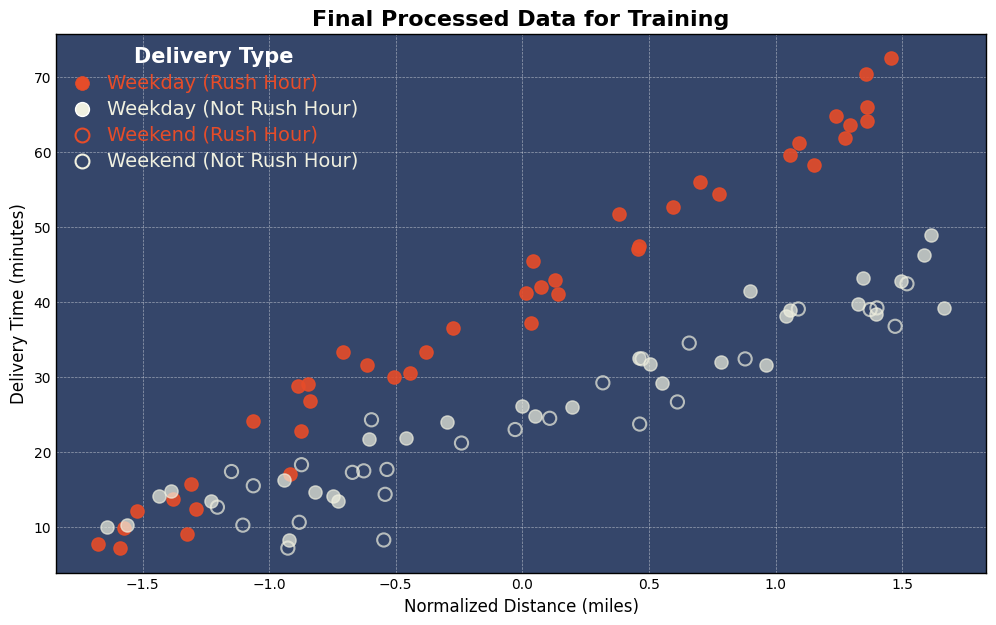

In [44]:
helper_utils.plot_final_data(features, targets)

In [45]:
nn.MSELoss?

Init signature: nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean') -> None
Docstring:     
Creates a criterion that measures the mean squared error (squared L2 norm) between
each element in the input :math:`x` and target :math:`y`.

The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = \left( x_n - y_n \right)^2,

where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
(default ``'mean'``), then:

.. math::
    \ell(x, y) =
    \begin{cases}
        \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
        \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
    \end{cases}

:math:`x` and :math:`y` are tensors of arbitrary shapes with a total
of :math:`N` elements each.

The mean operation still operates over all the elements, and divides by :math:`N`.

The division by :math:`N` can be avoided if one sets ``reduction = 's

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)